# Cartopy Tutorial

# Overview

### Within this notebook, we will cover:
#### 1: Utilizing Cartopy for making geographic plots
#### 2: Checking out a couple common projection types used in atmospheric science
#### 3: Plotting projections with some actual data

#### Cartopy is a wonderful package that allows you to plot data on different geographic projections depending on your needs. It also makes it nice and easy to work with built in shapefiles.

#### Lets import some packages!

In [1]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# Now that we have our packages imported, lets get into the nitty gritty of Cartopy.
## Cartopy meant to provide geographic projections and shapefiles for every day use in python to display geographic data
## Think of how you see meteorological maps produced in python with overlays of the United States. Thats Cartopy!

## Lets make a basic map to begin with 

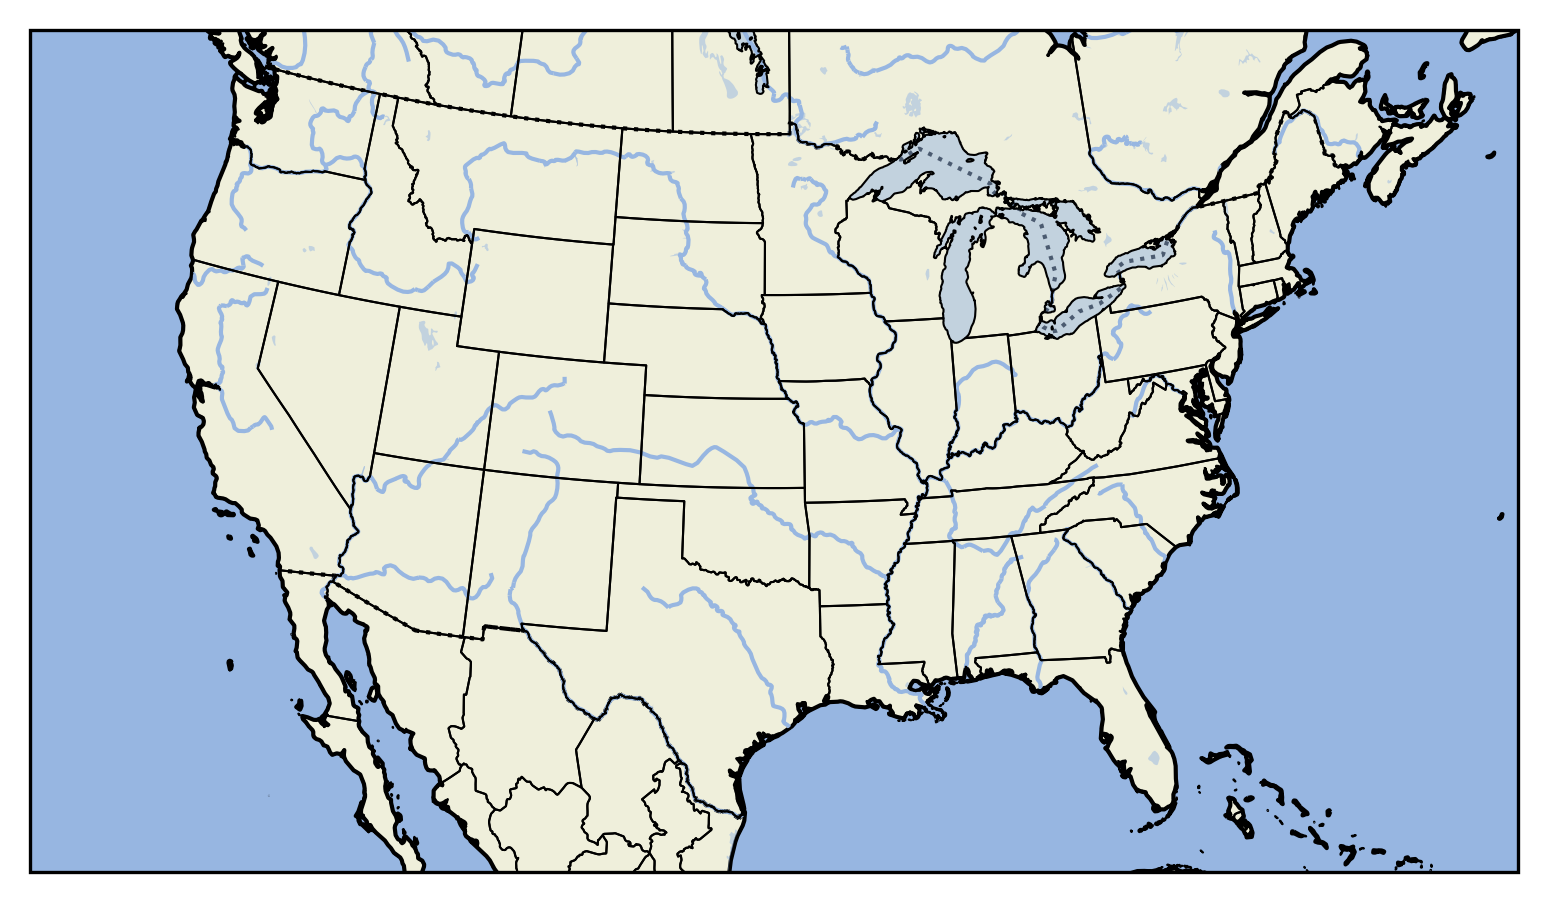

In [2]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-96,central_latitude=37.5))
ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)
plt.show()

## Boom. We have a plot of the United States. Lets break it down a bit so we can explain what some of the lines of code mean...

# Hmm what does "projection=ccrs.AlbersEqualArea(central_longitude=-96,central_latitude=37.5)" mean?

### Basically, anyone familiar with GIS or geography to some extent should be aware of different map projection types. This keyword argument is typically found when initializing a plot or a subplot, as in the case above. It defines the type of map projection you'd like to use, and additionally, it allows you to change major axis of the maps so you can view them at different perspectives or center them how you'd like to.

# What about "ax.set_extent([-125, -67, 24, 50]"?

### What this does is sets a coordinate extent so that you can focus your map on different regions throughout the world. Whatever the region may be. Coordinates are entered as a list or a tuple in the order of (Lon-West, Lon-East, Lat South, Lat North)

### Notice that the extent has another argument called crs. CRS is a coordinate reference system. This argument basically tells cartopy that the coordiantes you entered are in geodetic (lat/lon coordinates) rather than something like meters.

## There will be even more stuff to learn later, but for now, what are some common projections used in atmospheric science??

### #1: Plate Carree
#### This projection is used for fast map making and tends to distort the projected region quite significantly. It is a flat projection

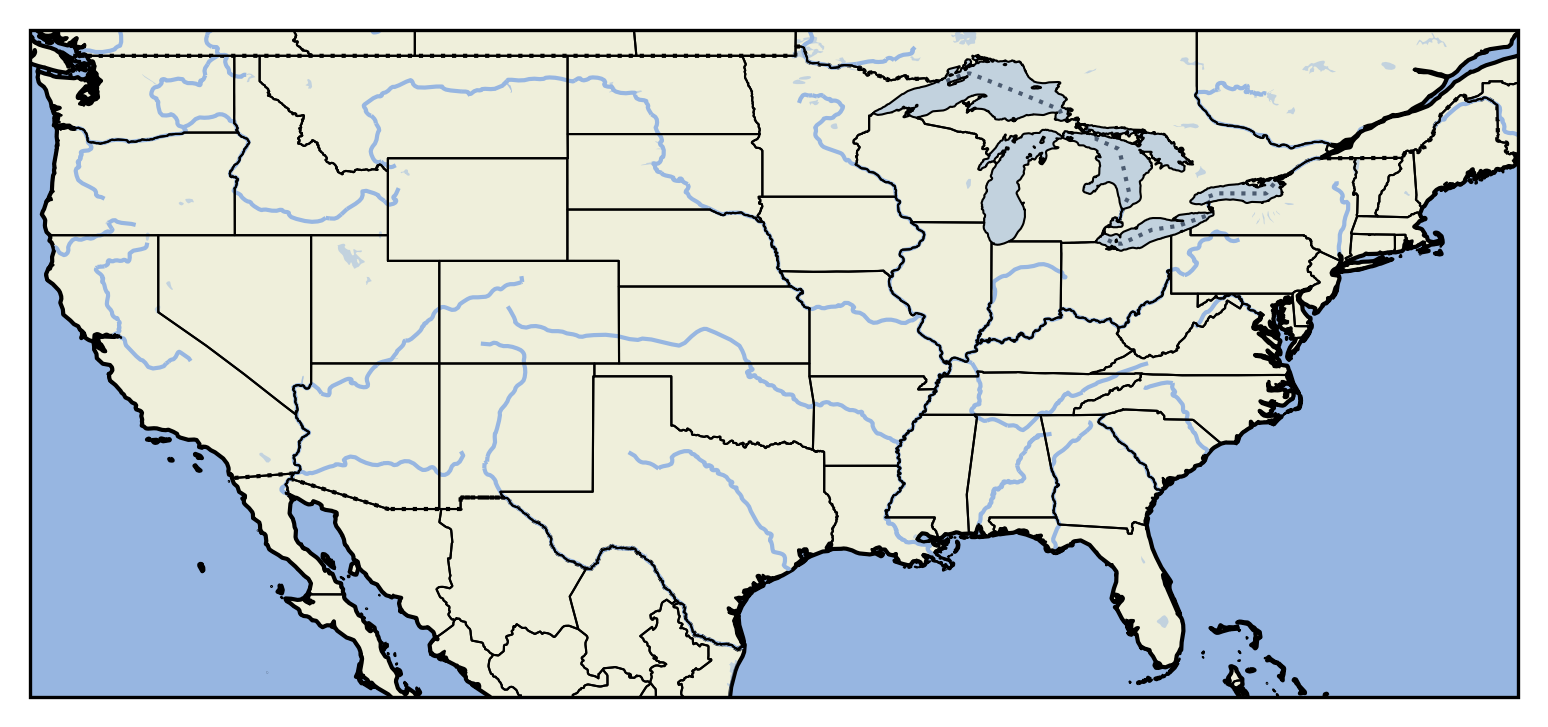

In [3]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)
plt.show()

### #2: Lambert Conformal Conic
#### This projection is often used for more mid-latitude projections and conserves the shape of small areas. 

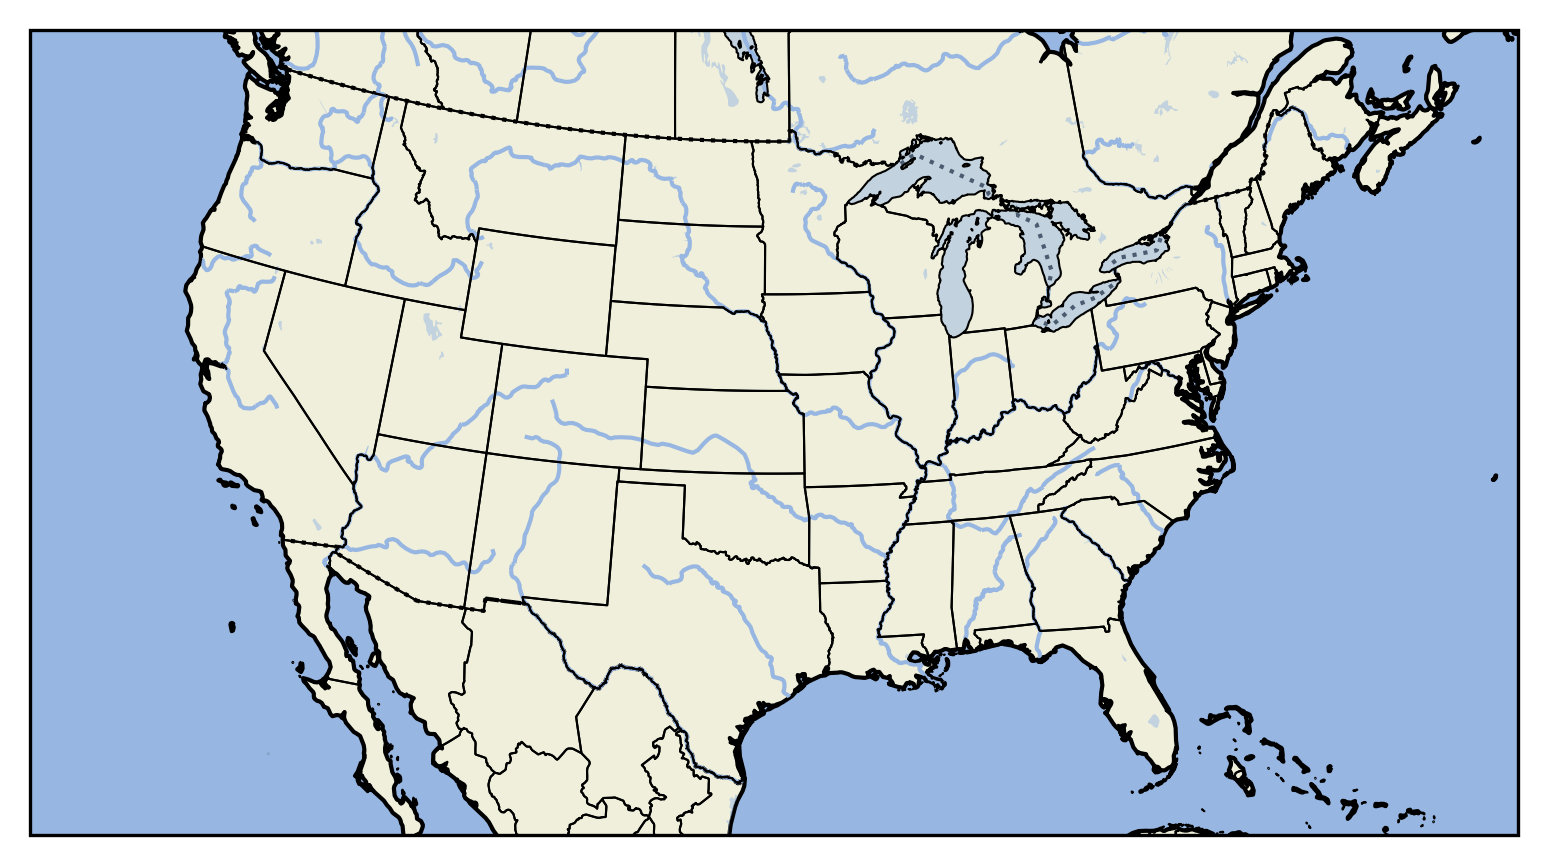

In [4]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-96.0, central_latitude=39.0))
ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)
plt.show()

### #3: Albers Equal Area
#### This projection preserves areas instead of shapes. Really good for CONUS maps.

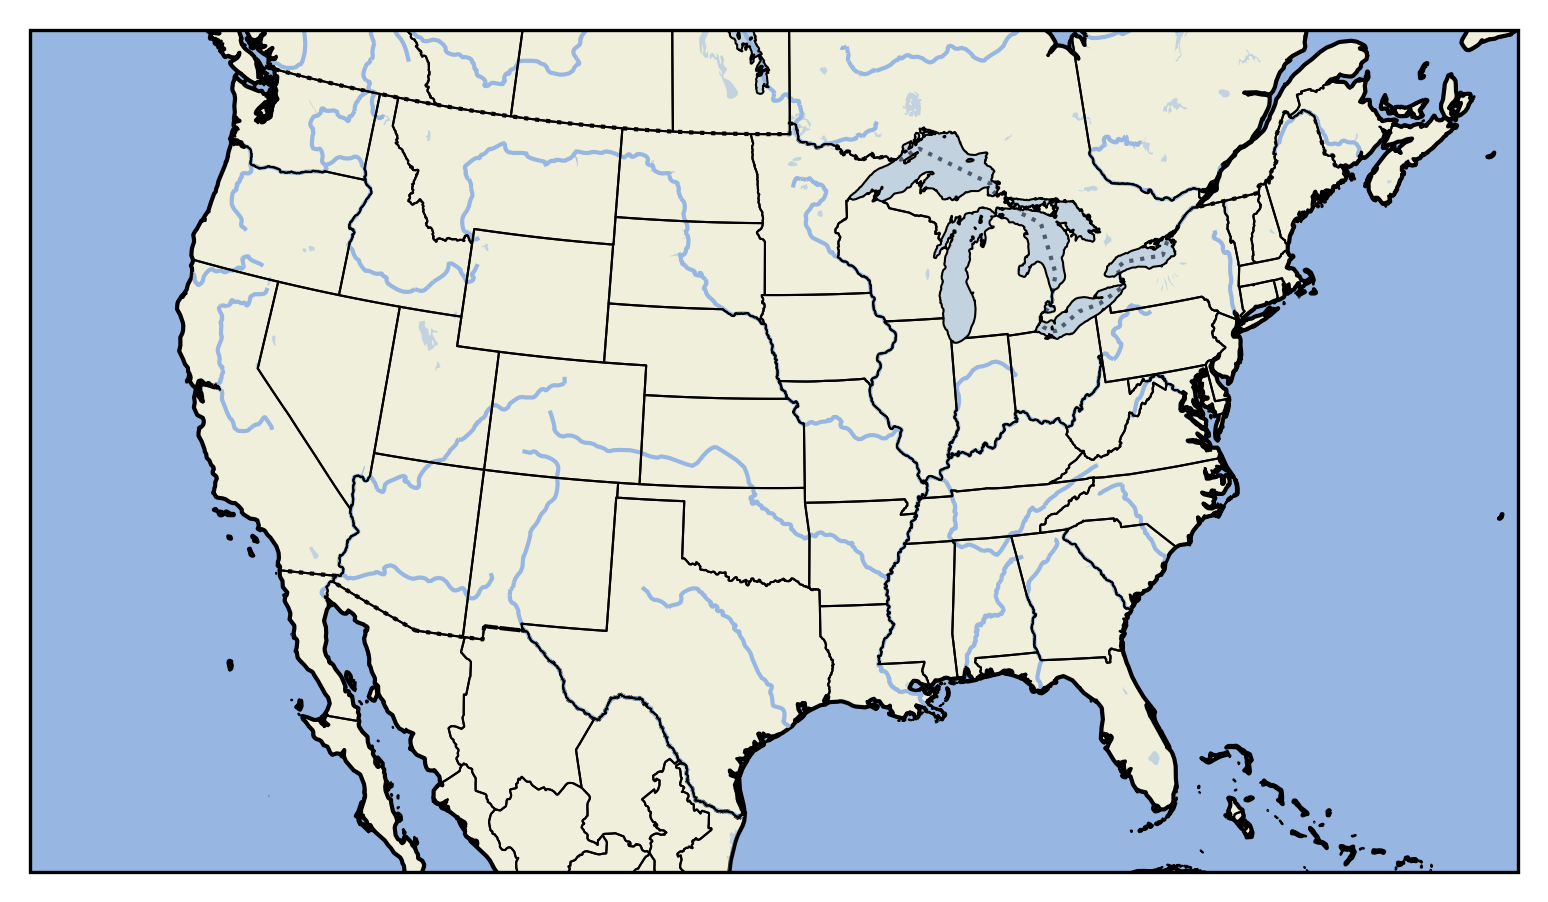

In [5]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-96.0, central_latitude=39.0))
ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)
plt.show()

## Now that we've looked at a few common projections, lets plot some data on a map!

## Lets initialize some gridded data with xarray
#### This is data created by myself to make a mean climatology of severe weather for days of year.

In [6]:
import xarray as xr

In [7]:
pph = xr.open_dataset('/home/bweart1/Practically Perfect /climatology_pph_totalsvr_5daymex.nc', engine='netcdf4')

In [8]:
pph

<xarray.Dataset> Size: 53MB
Dimensions:                         (day_of_year: 366, y: 65, x: 93)
Coordinates:
  * x                               (x) float64 744B 0.0 1.0 2.0 ... 91.0 92.0
  * y                               (y) float64 520B 0.0 1.0 2.0 ... 63.0 64.0
  * day_of_year                     (day_of_year) <U5 7kB '01-01' ... '12-31'
Data variables:
    p_perfect_totalsvr_climatology  (day_of_year, y, x) float64 18MB ...
    p_perfect_totalsvr_clim_max     (day_of_year, y, x) float64 18MB ...
    p_perfect_totalsvr_clim_std     (day_of_year, y, x) float64 18MB ...
    lat                             (y, x) float64 48kB ...
    lon                             (y, x) float64 48kB ...
Attributes:
    description:  5-day centered climatological average PPH for each day of t...

### For more information on how to work with netCDF files, check out my Xarray Tutorial!

In [9]:
lat = pph.lat.values
lon = pph.lon.values
data = pph.p_perfect_totalsvr_climatology.isel(day_of_year=120)

In [10]:
doy = pph.day_of_year.values
day=doy[120]
day

'04-30'

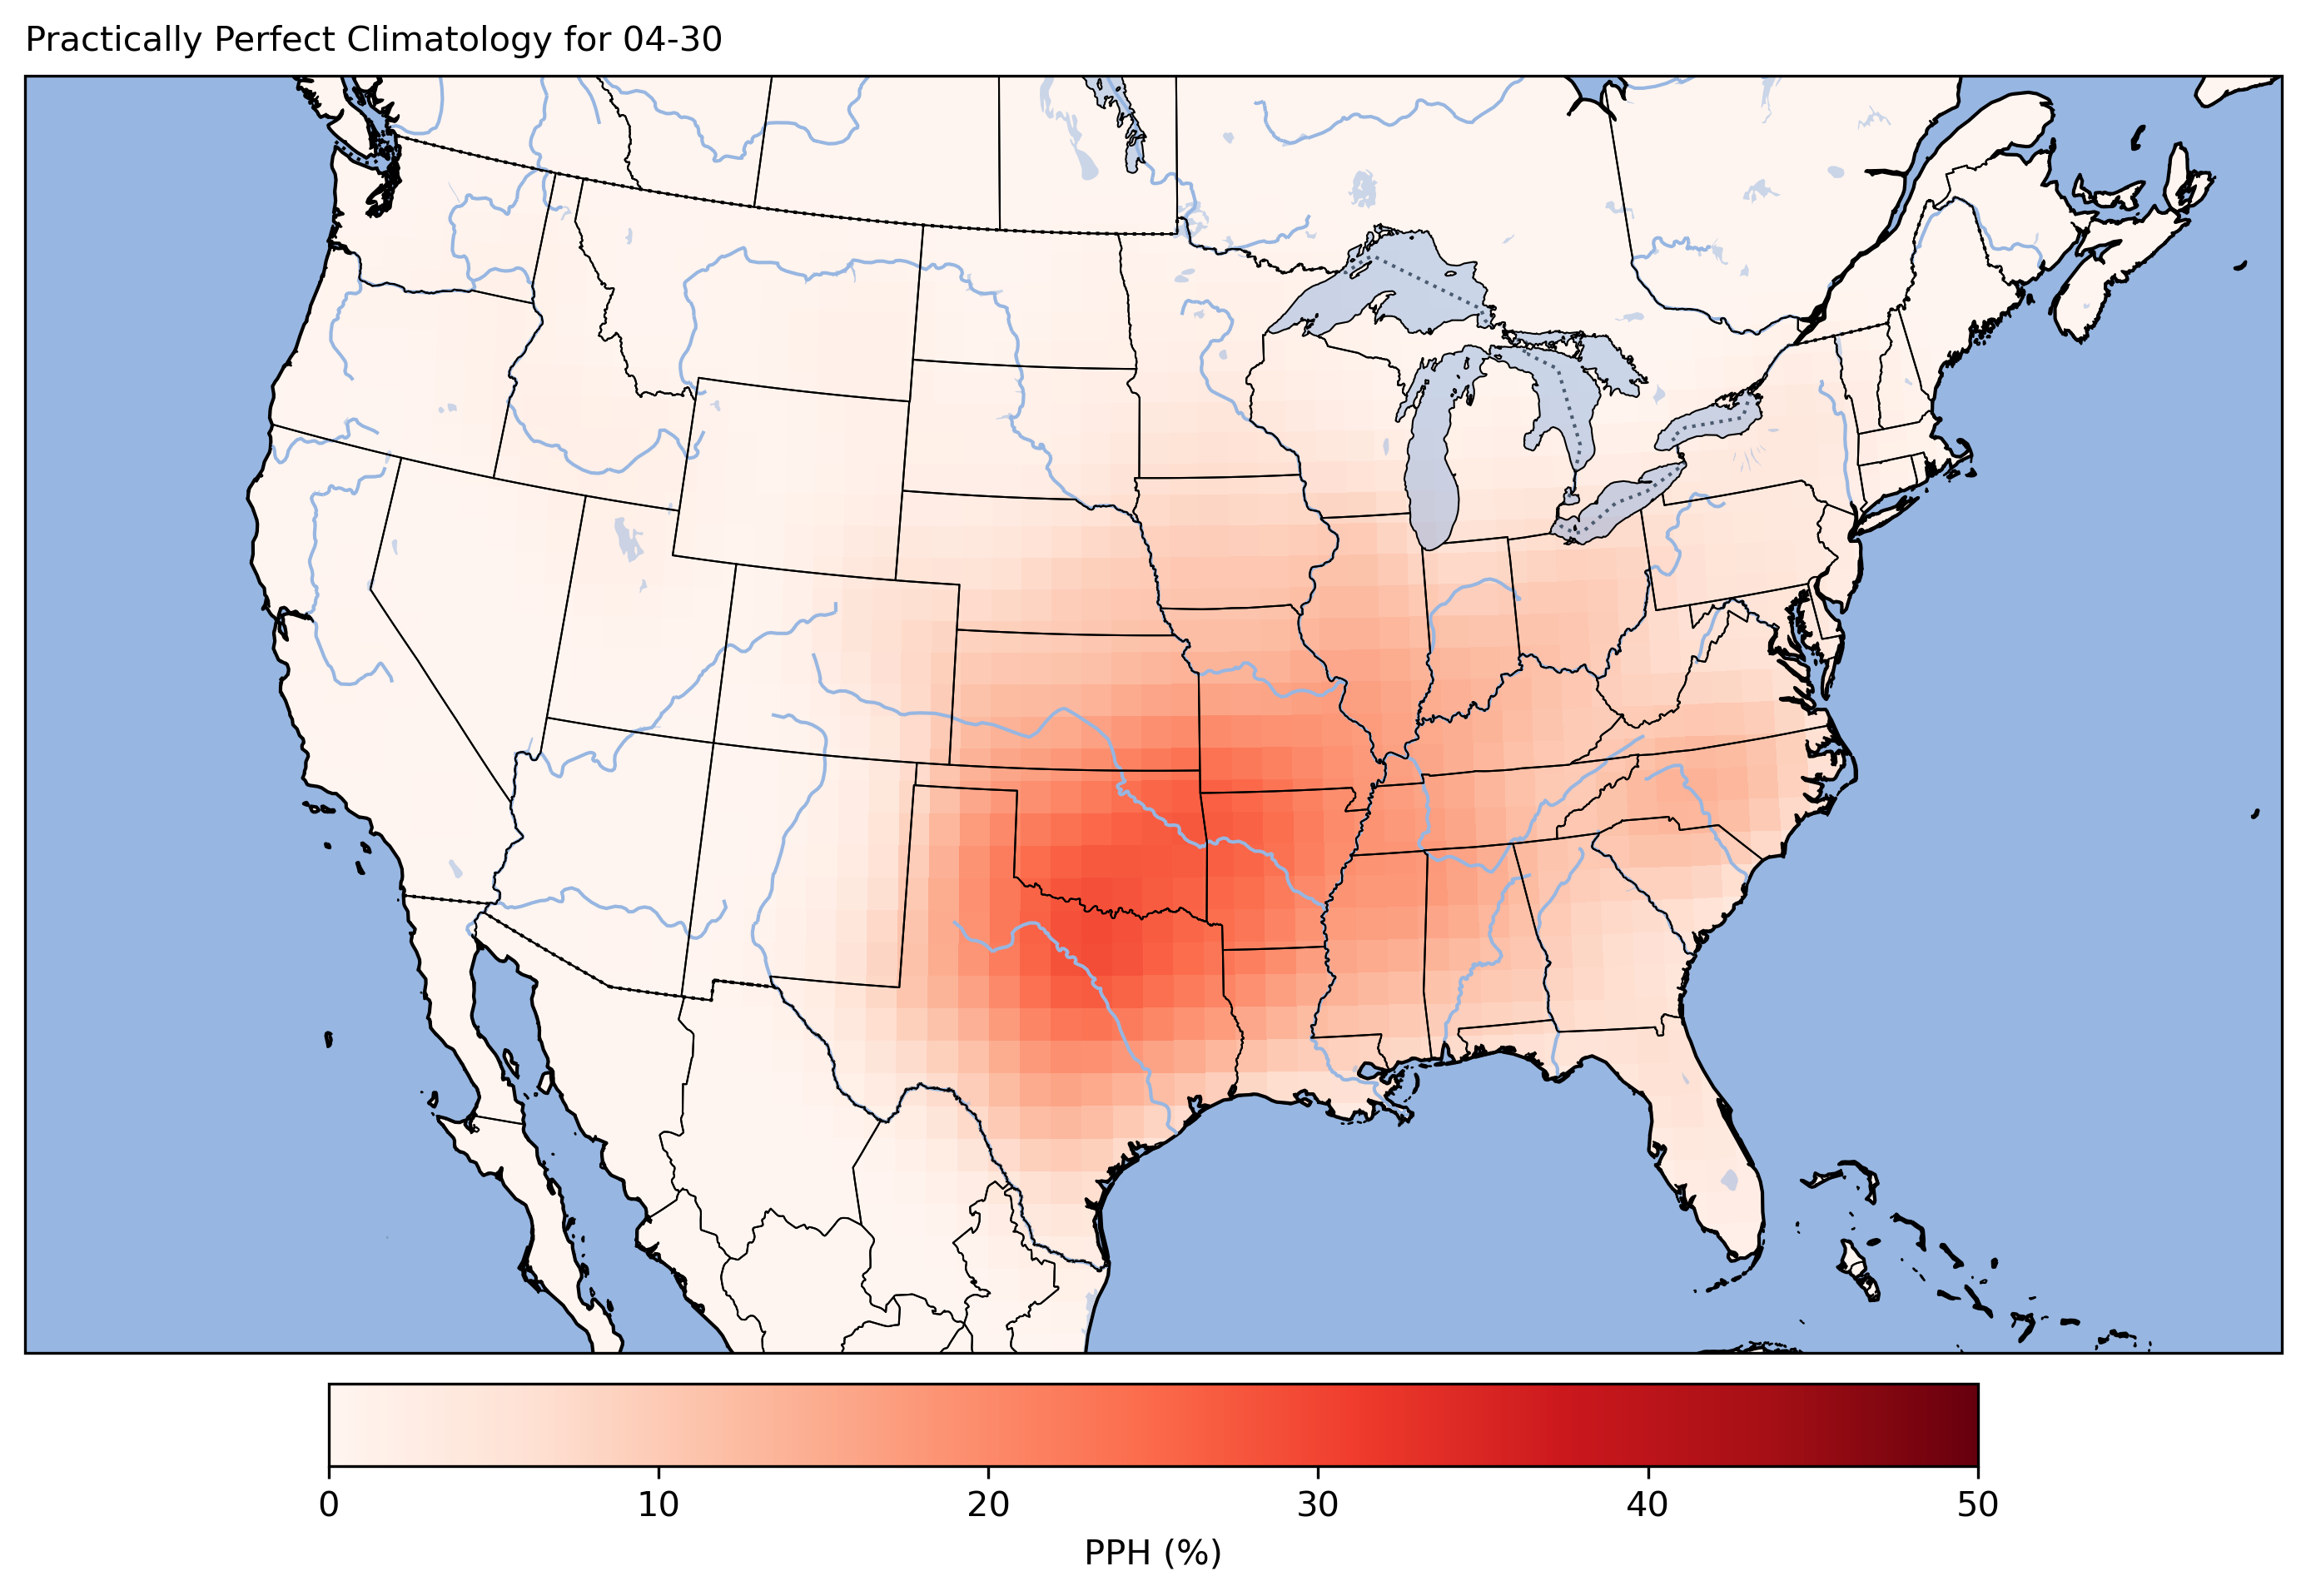

In [11]:
fig = plt.figure(dpi=300, figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-96.0, central_latitude=39.0))
ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)
ax.text(0, 1.02, f"Practically Perfect Climatology for {day}", transform=ax.transAxes, fontsize=10, ha='left')
plot_var = ax.pcolormesh(lon, lat, data, vmin=0, vmax=50, cmap='Reds', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, zorder=1)
cbar = plt.colorbar(plot_var, ax=ax, orientation='horizontal', shrink=0.71, pad=0.02)
cbar.set_label("PPH (%)", fontsize=10)


plt.show()

### Lets change the projection type to see how our map looks 

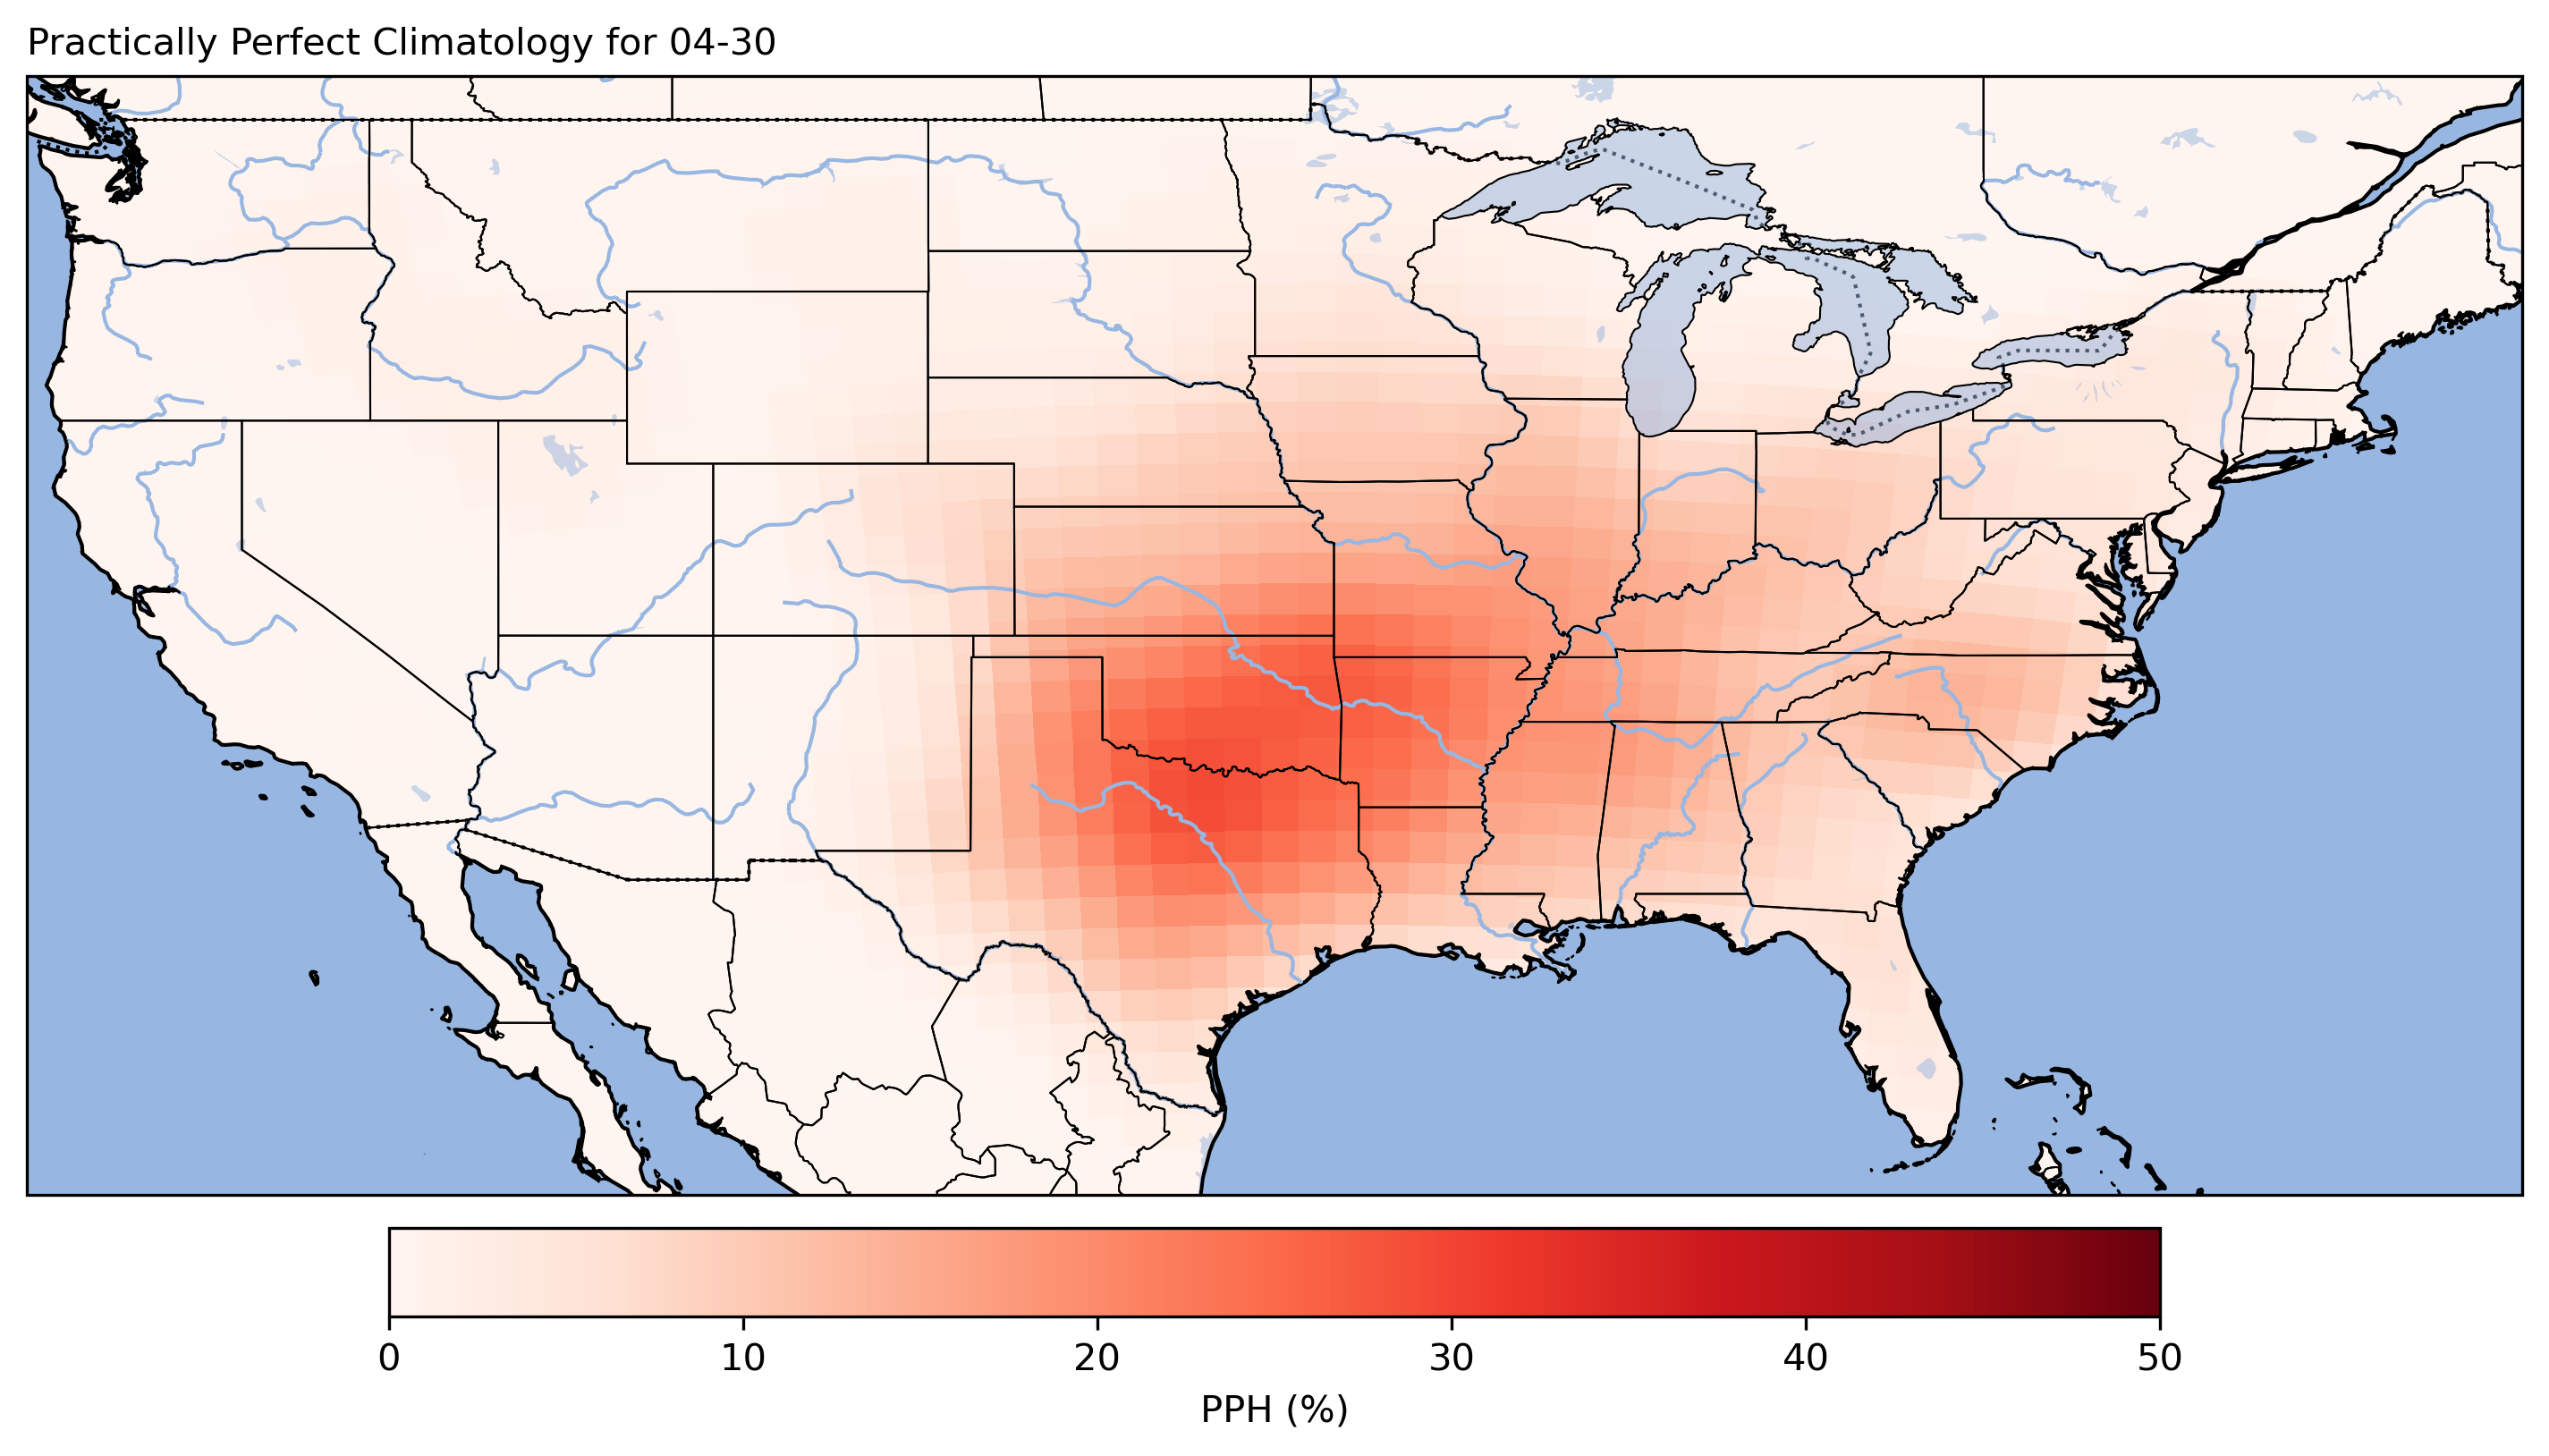

In [12]:
fig = plt.figure(dpi=300, figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)
ax.text(0, 1.02, f"Practically Perfect Climatology for {day}", transform=ax.transAxes, fontsize=10, ha='left')
plot_var = ax.pcolormesh(lon, lat, data, vmin=0, vmax=50, cmap='Reds', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, zorder=1)
cbar = plt.colorbar(plot_var, ax=ax, orientation='horizontal', shrink=0.71, pad=0.02)
cbar.set_label("PPH (%)", fontsize=10)


plt.show()

### Wow... That looks like trash!

### Lets go over a kwarg that im sure we all noticed, transform

### What is transform? Transform enables you to tell cartopy what coordinate system your data is in so it can be transformed to the projection type so your data can conform to the plot

### Thats all for this notebook! Hopefully this was informative!